In [35]:
import os
from comet_ml import Experiment

experiment = Experiment(api_key=os.environ.get("COMET_API_KEY"), project_name="home-credit")
experiment.set_name('home-credit-eda')

COMET WARNING: We detected that you are running inside a Ipython/Jupyter notebook environment but we cannot save your notebook source code. Please be sure to have installed comet_ml as a notebook server extension by running:
jupyter comet_ml enable 
For more details, please refer to: https://www.comet.ml/docs/python-sdk/warnings-errors
COMET INFO: old comet version (1.0.19) detected. current: 1.0.21 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET WARNING: Comet.ml support for Ipython Notebook is limited at the moment, automatic monitoring and stdout capturing is deactivated 
For more details, please refer to: https://www.comet.ml/docs/python-sdk/warnings-errors
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/cometpublic/home-credit/1e8c7cef7f2a403895319df5576b3b1b



In [2]:
import pandas as pd

df = pd.read_csv('./application_train.csv', sep=',')
df.head()

/Users/dhruvnair/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dhruvnair/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# integer valued features
integer_df = df.select_dtypes(include=['int'])
integer_df.drop(columns=['SK_ID_CURR', 'TARGET'], axis=1, inplace=True)

# some integer features are actually categorical features. So we need to extract these columns
binary_cols = [col for col in integer_df if (list(integer_df[col].unique()) == [0, 1]) or (list(integer_df[col].unique()) == [1, 0])]
integer_df.shape

/Users/dhruvnair/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(307511, 39)

In [4]:
# float valued features
float_df = df.select_dtypes(exclude=['int', 'object'])
float_df.shape

(307511, 65)

In [5]:
# categorical features
categorical_df = df.select_dtypes(exclude=['int', 'float'])
categorical_df.shape

(307511, 16)

In [6]:
# Plot target distribution
import matplotlib.pyplot as plt

feature = "TARGET"

ax = df[feature].value_counts().plot(kind='bar',
                                    figsize=(15,10), 
                                    color='blue')
ax.set_xlabel(feature, fontsize=14)
ax.set_ylabel("Count", fontsize=14)
experiment.log_figure(figure_name=feature, figure=plt)

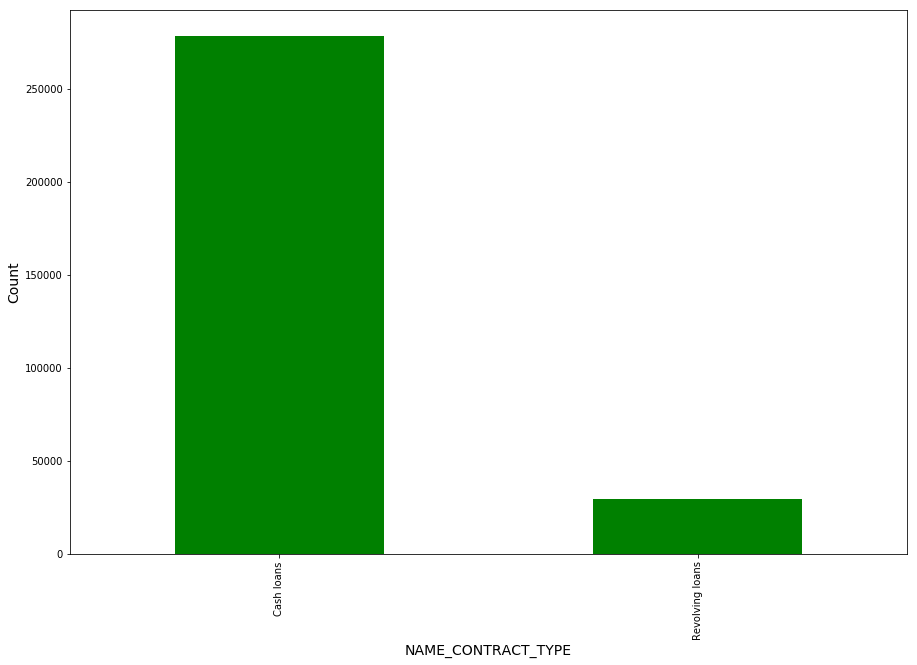

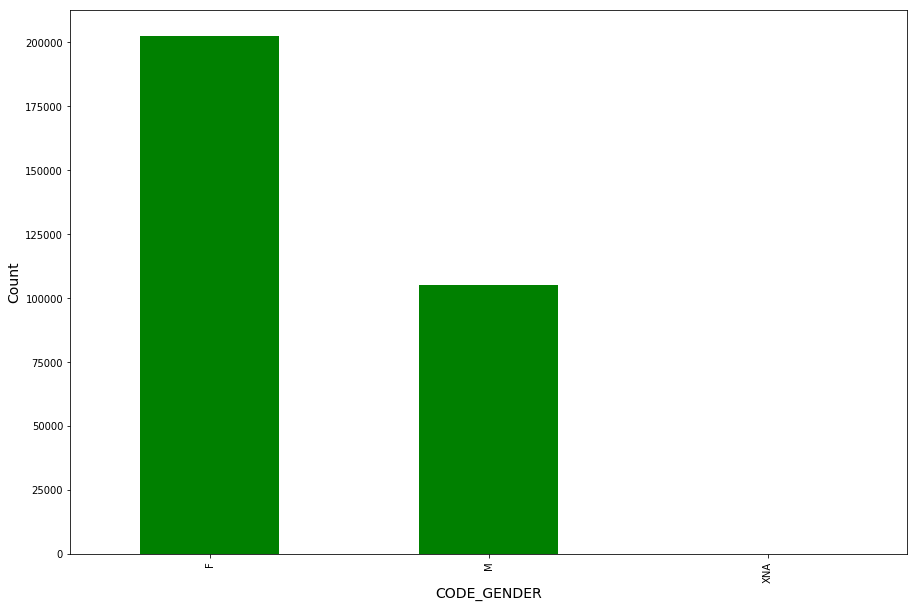

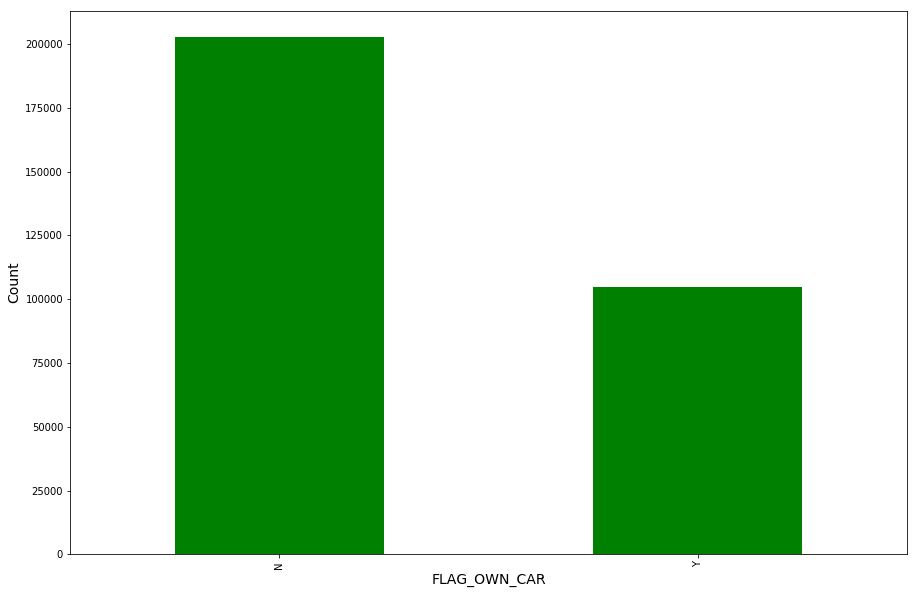

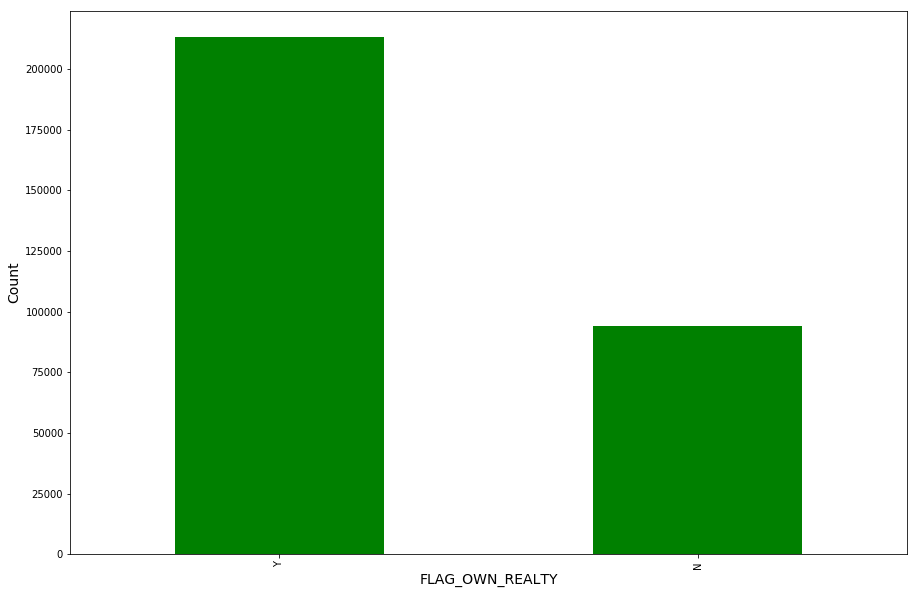

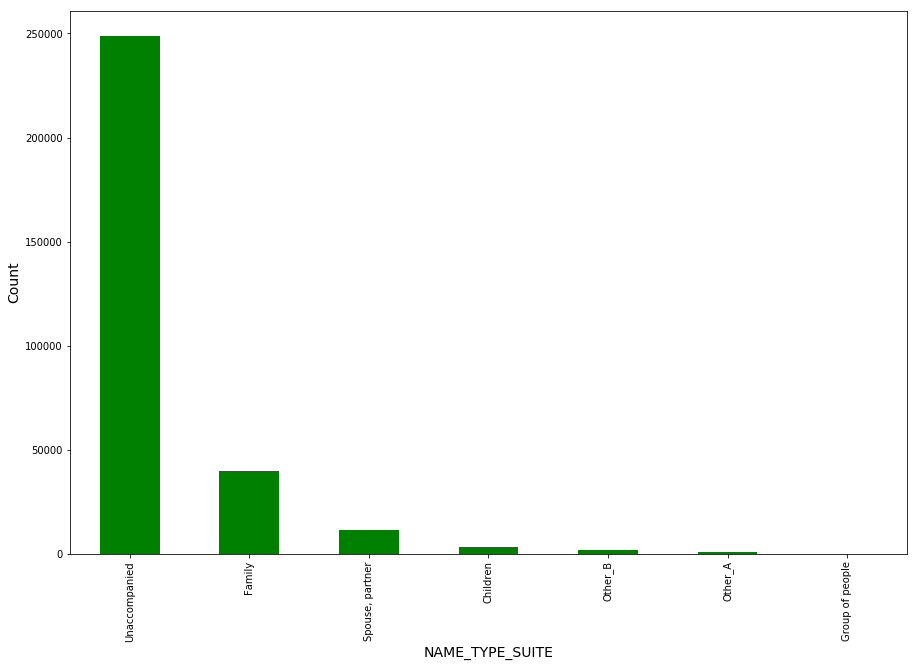

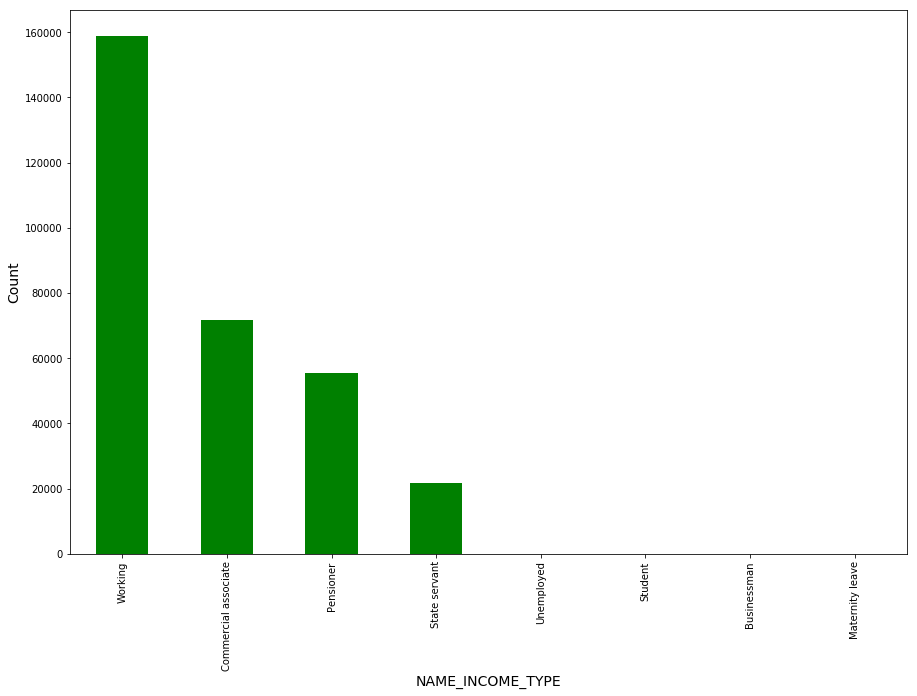

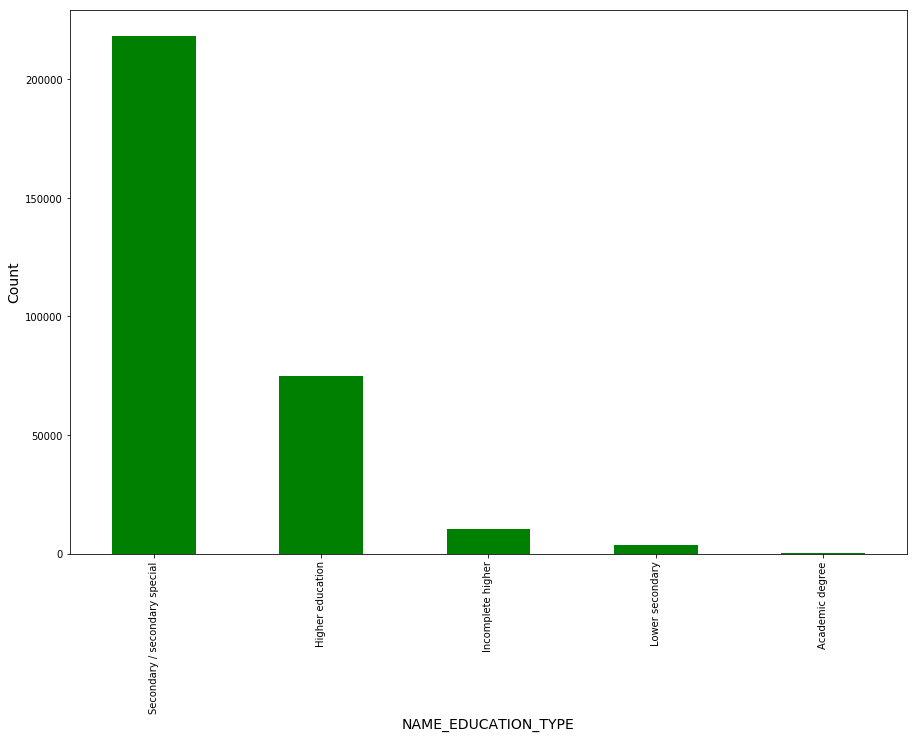

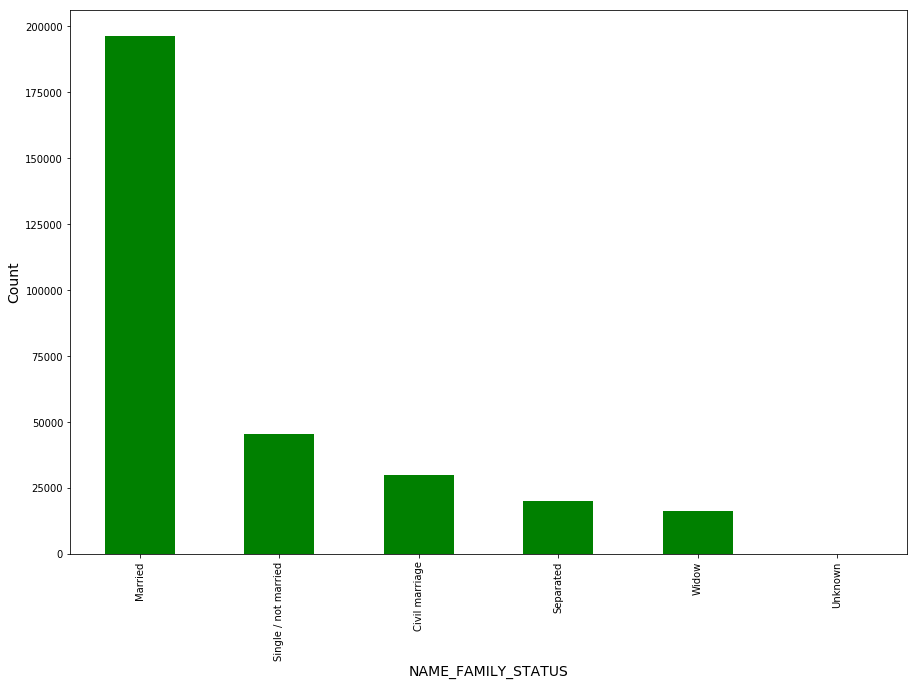

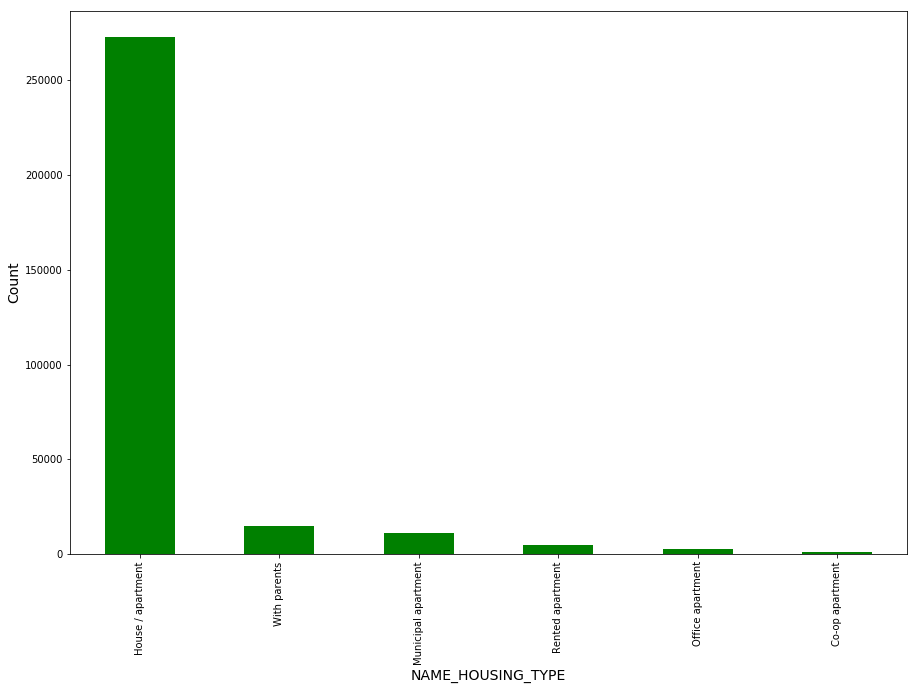

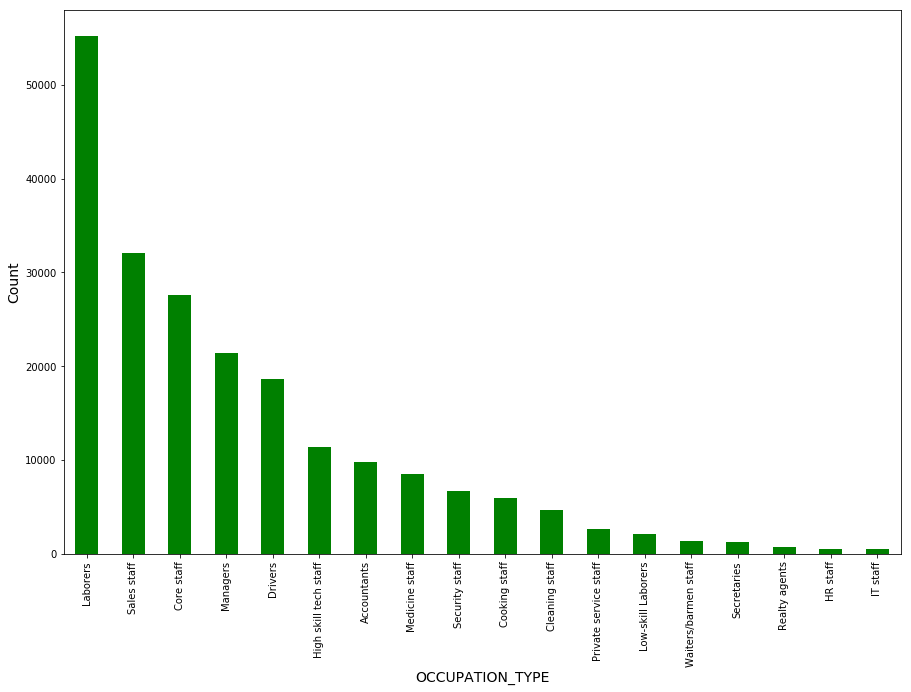

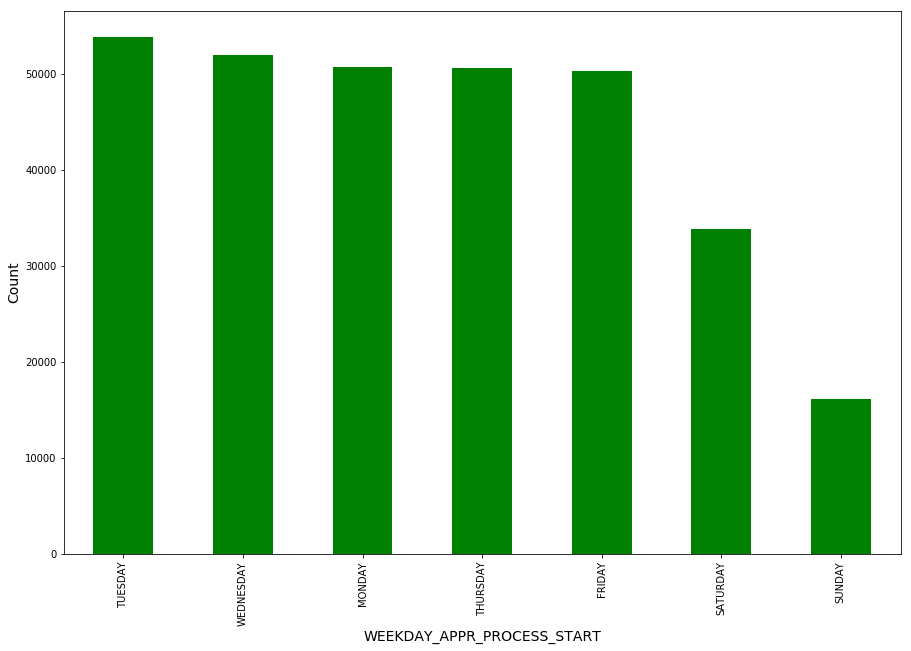

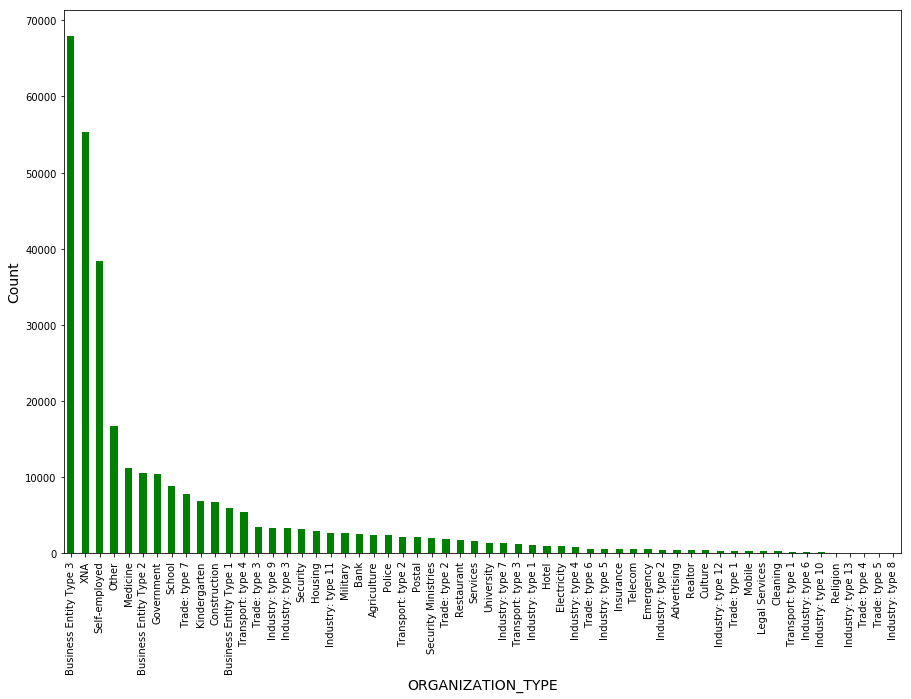

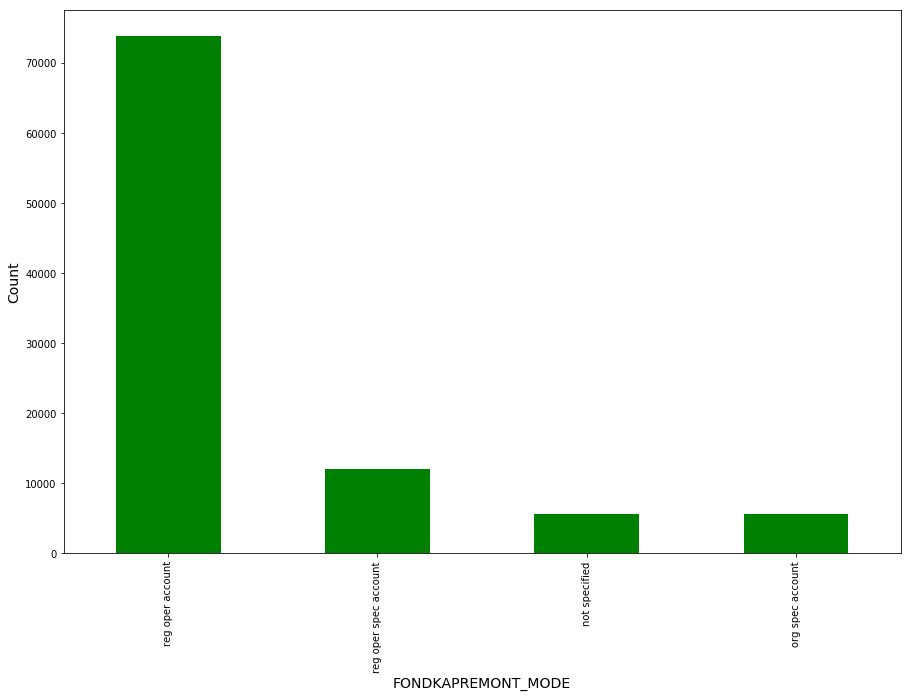

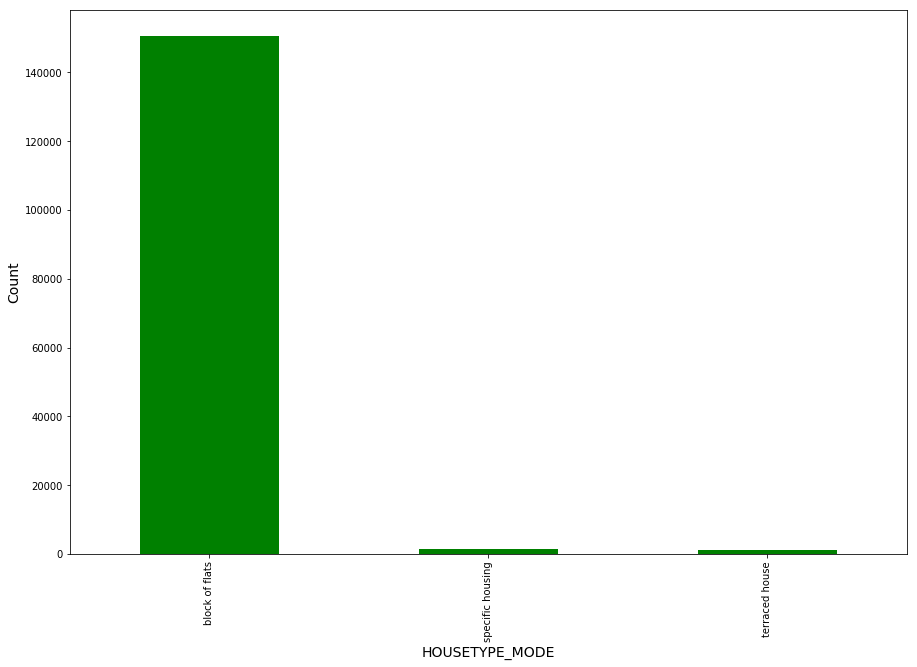

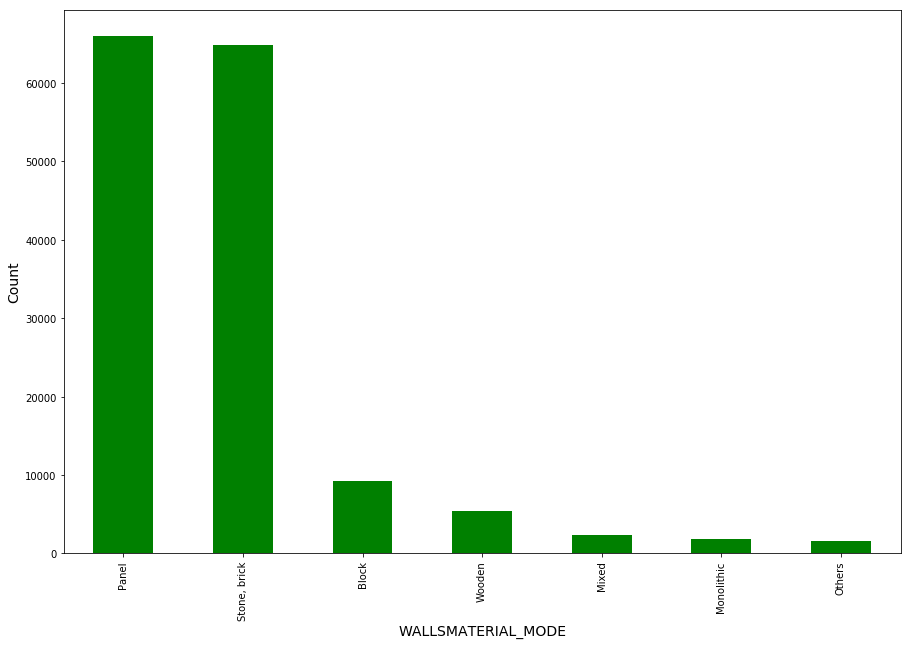

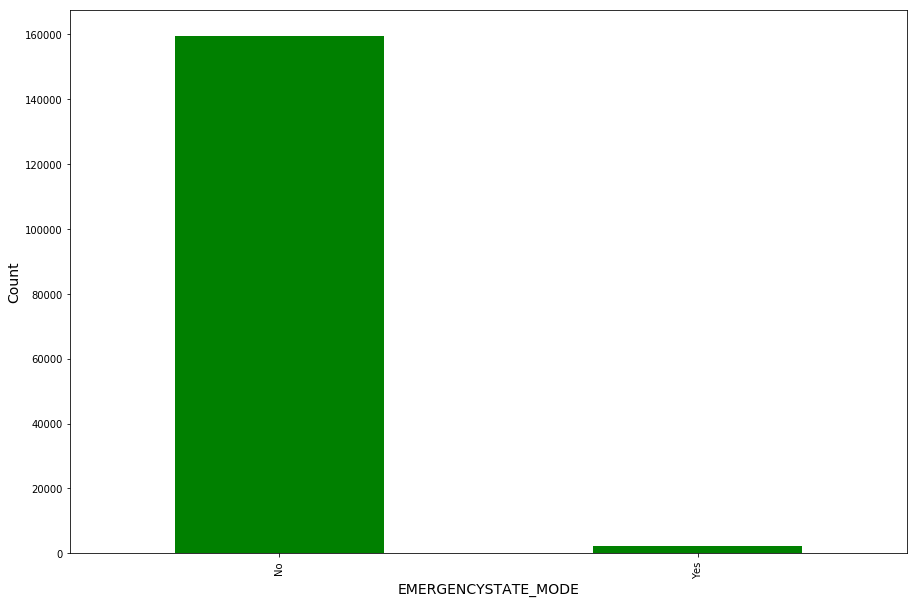

In [7]:
# Plot categorical features
import matplotlib.pyplot as plt

categorical_features = list(df.select_dtypes(exclude=['int', 'float']).columns)

for feature in categorical_features:
    ax = df[feature].value_counts().plot(kind='bar',
                                    figsize=(15,10), 
                                    color='green')
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel("Count", fontsize=14)
    experiment.log_figure(figure_name=feature, figure=plt)
    plt.show()

In [8]:
# pca transformation function
from sklearn.decomposition import PCA
from sklearn import preprocessing

def do_pca(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    X_normalized = min_max_scaler.fit_transform(df)

    pca = PCA(n_components=10)
    components = pca.fit_transform(X_normalized)
    columns = ['pca-{}'.format(i+1) for i in range(len(components[0,:]))]
    
    return (pca, pd.DataFrame(components, columns=columns))
    

/Users/dhruvnair/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dhruvnair/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dhruvnair/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dhruvnair/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


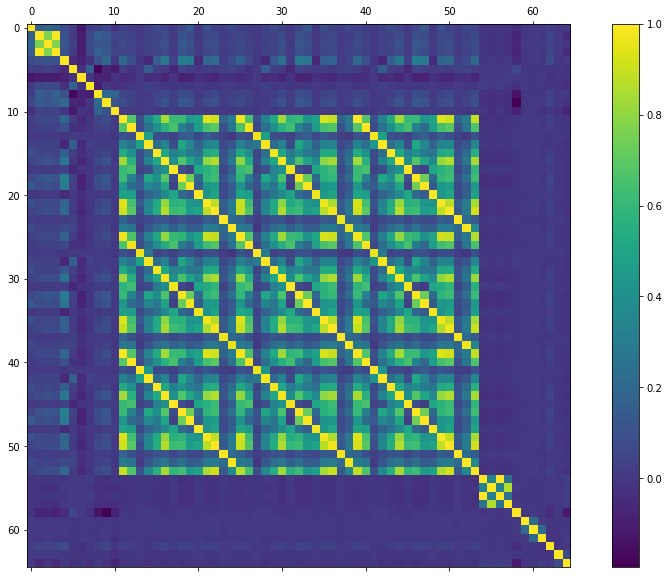

In [9]:
# plot correlation matrix for float type features
import matplotlib.pyplot as plt

float_columns = list(float_df.columns)
float_corr = float_df.corr()

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(float_corr, interpolation='nearest')
fig.colorbar(cax)
experiment.log_figure(figure_name='Float Features, Correlation Plot', figure=plt)

In [10]:
# Select float features for pca transformation
pca_candidates = float_df.iloc[:, 11:53]
pca_candidates = pca_candidates.fillna(method='ffill')
pca, X_pca = do_pca(pca_candidates)

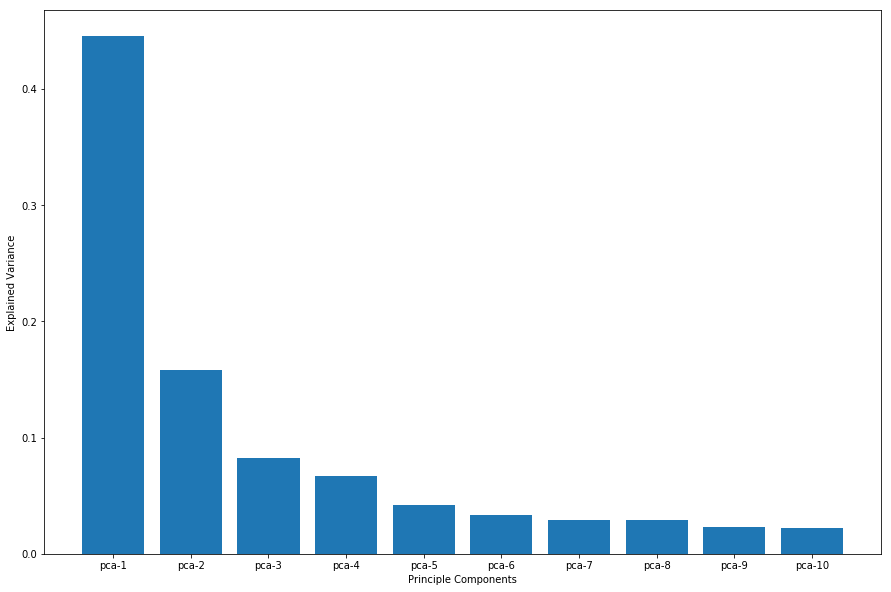

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.bar(X_pca.columns, pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principle Components')
experiment.log_figure(figure_name='Top 10 PCA Components', figure=plt)
plt.show()

In [ ]:
X_encoded = pd.get_dummies(categorical_df)
X_encoded = pd.concat([X_encoded, integer_df[binary_cols]], axis=1)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
    
def rf_feature_plot(X, y, title):
    rf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=31)
    rf.fit(X, y)

    features = list(X.columns)
    importances = rf.feature_importances_
    indices = np.argsort(importances).tolist()

    _tmp = indices[::-1][:15]
    _x = range(len(_tmp))

    feature_labels = [features[i] for i in _tmp]
    top_importance = [importances[i] for i in _tmp]

    plt.figure(figsize=(20,20))
    plt.barh(_x, top_importance[::-1], color='b', align='center')
    plt.yticks(_x, feature_labels[::-1], fontsize=14)
    plt.xlabel('Relative Importance')
    experiment.log_figure(figure_name=title, figure=plt)
    plt.show()

In [ ]:
# Drop pca candidate features from float_df
# Drop categorical features from integer_df
float_columns = list(float_df.columns)

float_df.drop(columns=float_columns[11:53], inplace=True, axis=1)
integer_df.drop(columns=binary_cols, inplace=True, axis=1)

integer_df.fillna(method='ffill', inplace=True)
float_df.fillna(method='ffill', inplace=True)
float_df.fillna(method='bfill', inplace=True)

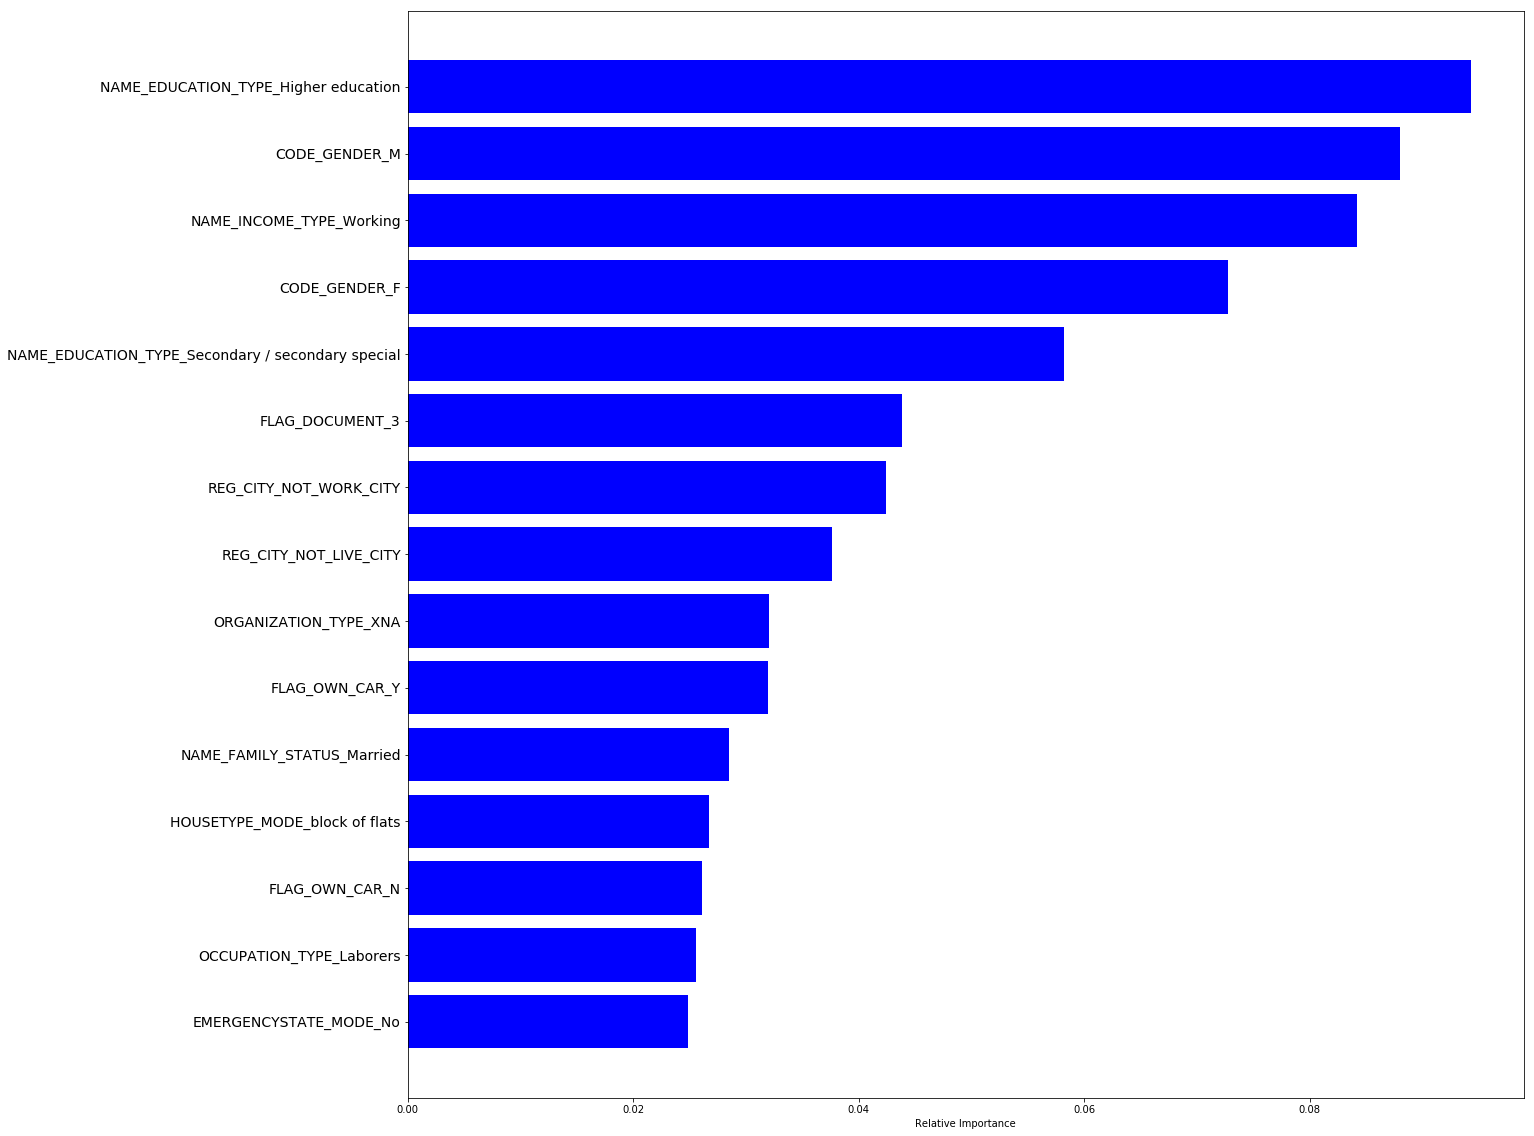

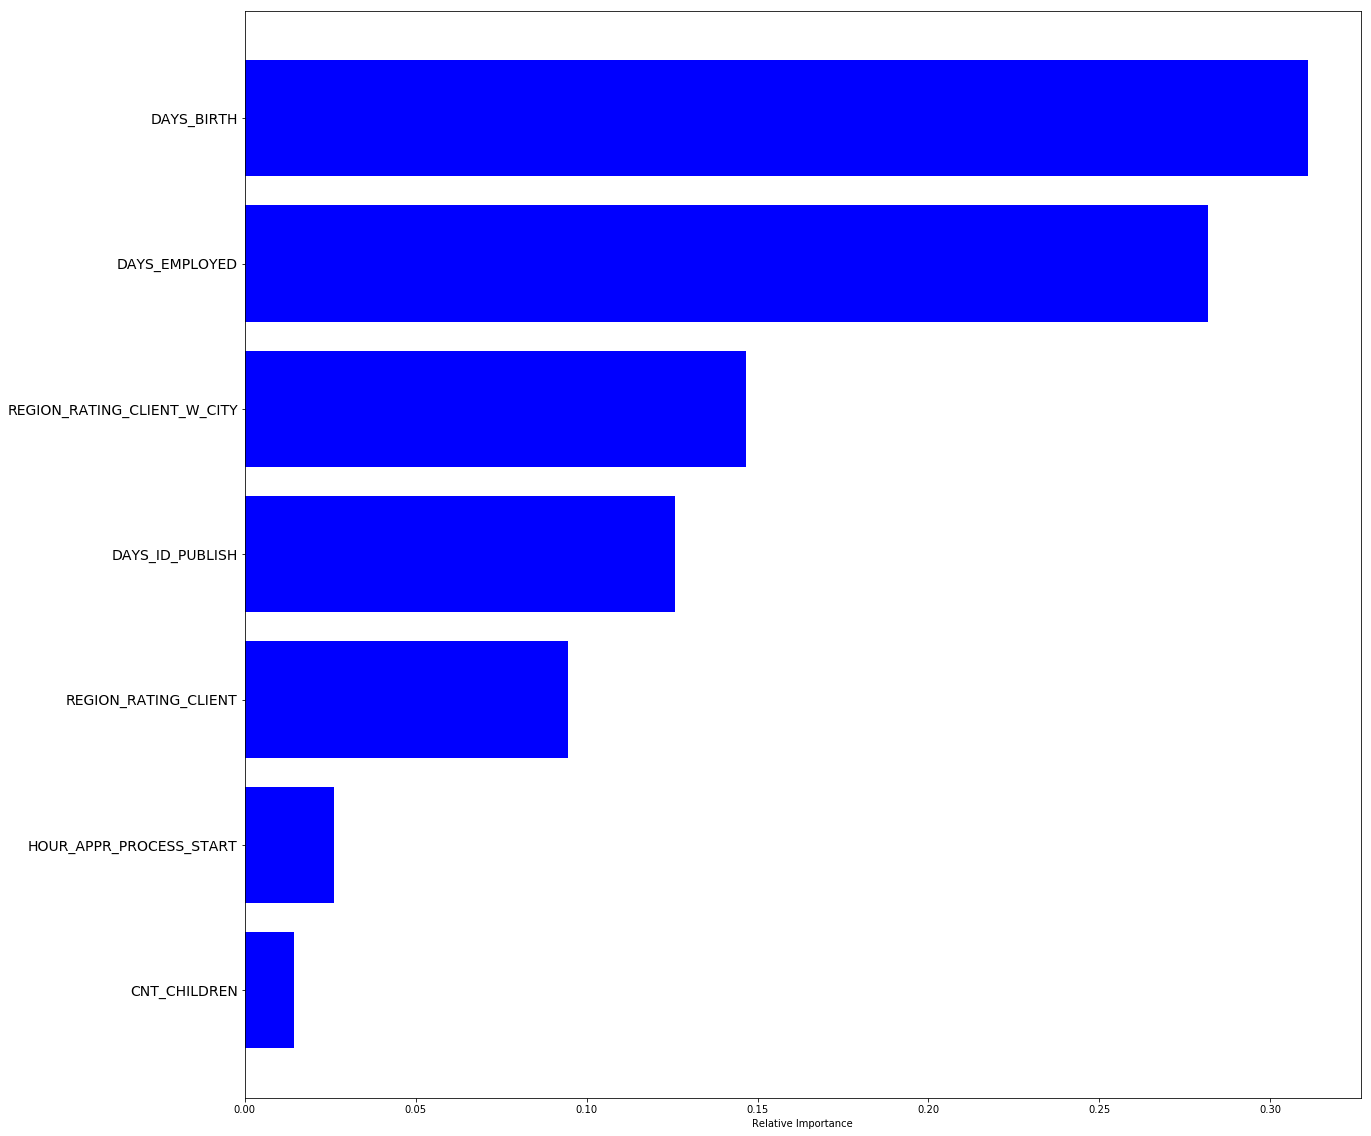

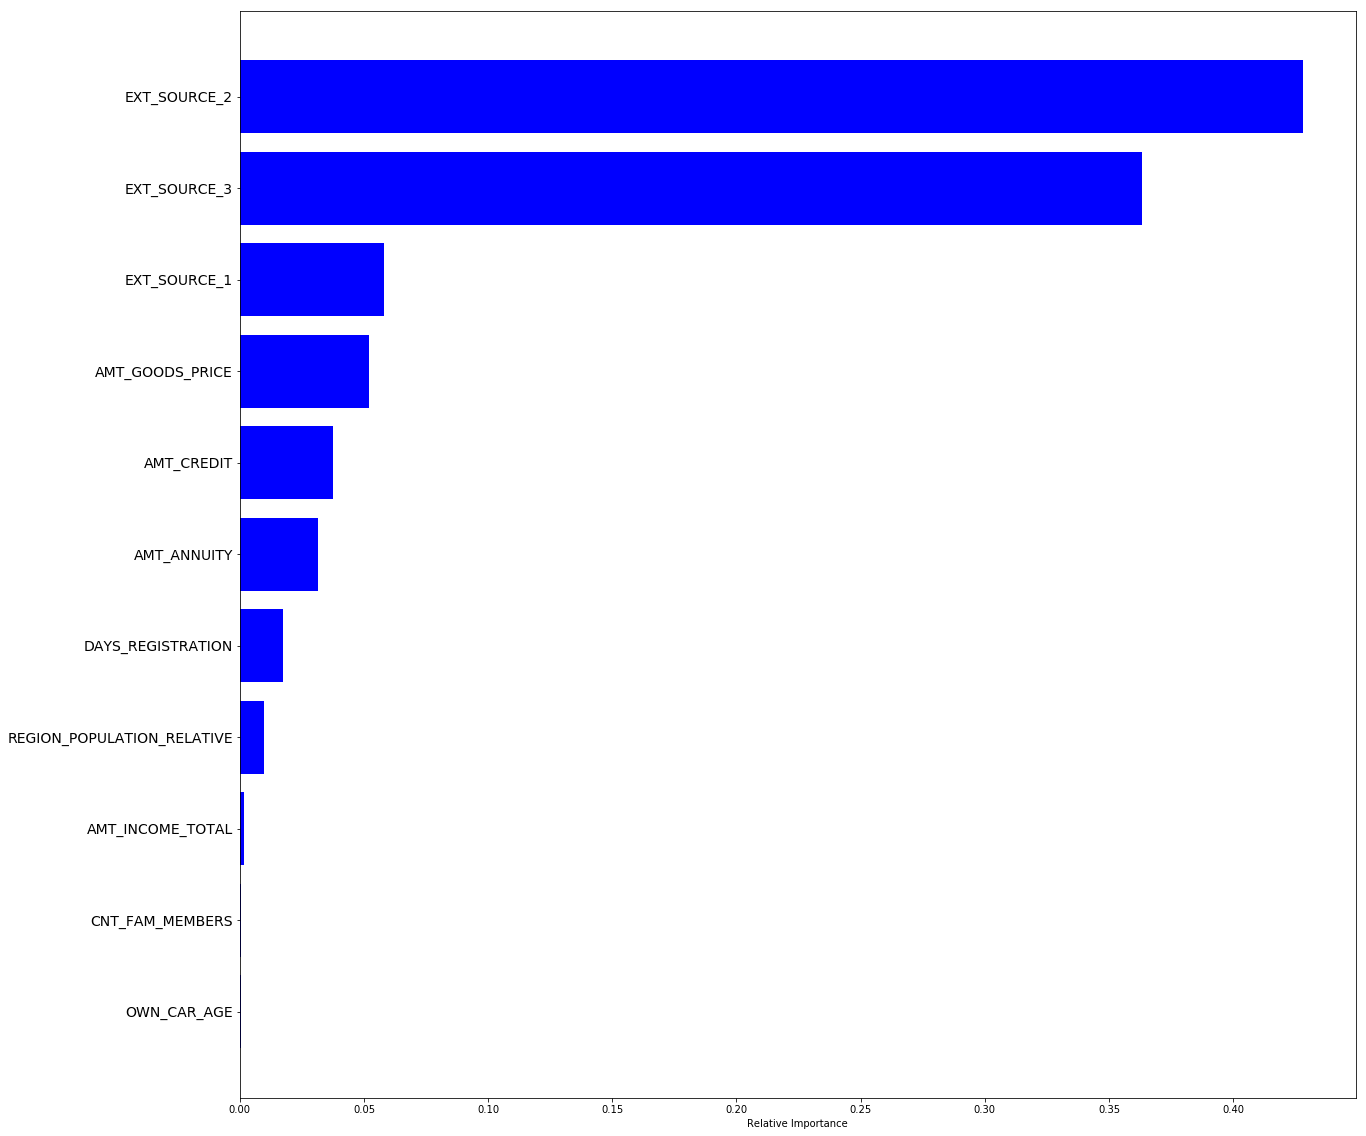

In [23]:
rf_feature_plot(X_encoded, df['TARGET'], 'RF Categorical Feature Importance')
rf_feature_plot(integer_df, df['TARGET'], 'RF Integer Feature Importance')
rf_feature_plot(float_df, df['TARGET'], 'RF Float Feature Importance')

In [10]:
float_df.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,26.0,1.0,0.083037,0.262949,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,26.0,2.0,0.311267,0.622246,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,0.311267,0.555912,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,26.0,2.0,0.311267,0.650442,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,26.0,1.0,0.311267,0.322738,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
import lightgbm as lgb
import matplotlib.pyplot as plt

def lightgbm_feature_plot(df, y, title):
    train_data = lgb.Dataset(data=df, label=y, feature_name=list(df.columns))
    param = {'num_leaves':31, 'num_trees':100, 'objective':'binary', 'metric' : 'auc'}
    num_round = 10
    
    bst = lgb.train(param, train_data, num_round)
    ax = lgb.plot_importance(bst, max_num_features=15, figsize=(15, 10), height=0.5)
    experiment.log_figure(figure_name=title, figure=plt)

/Users/dhruvnair/miniconda3/lib/python3.6/site-packages/lightgbm/engine.py:102: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


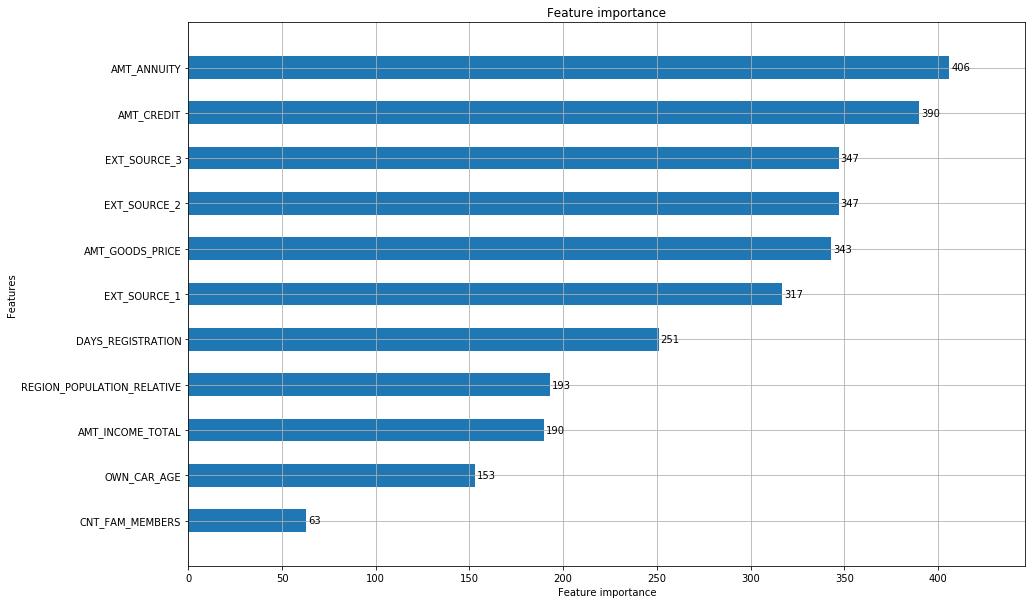

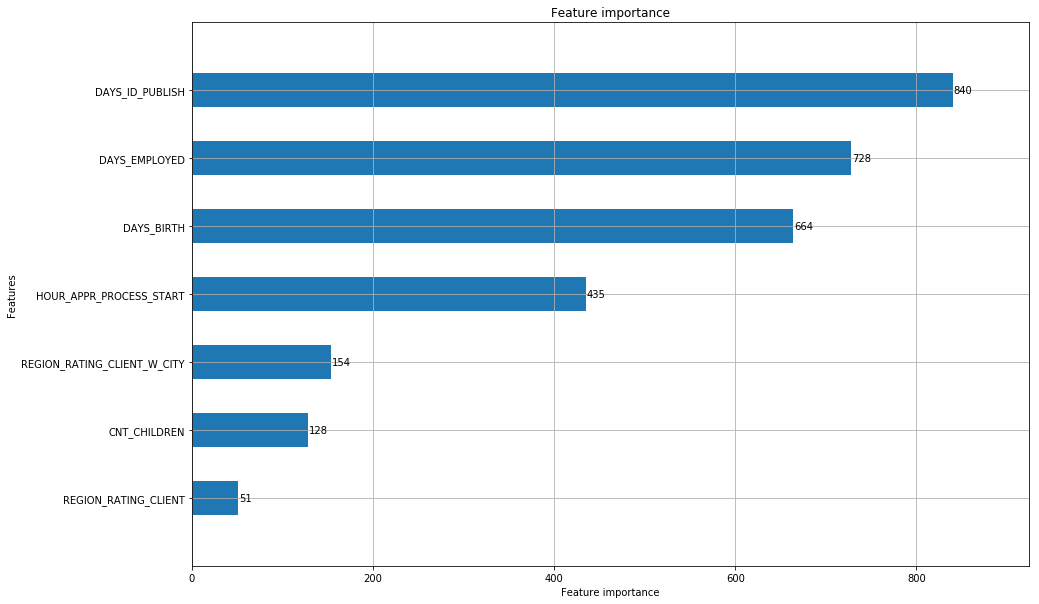

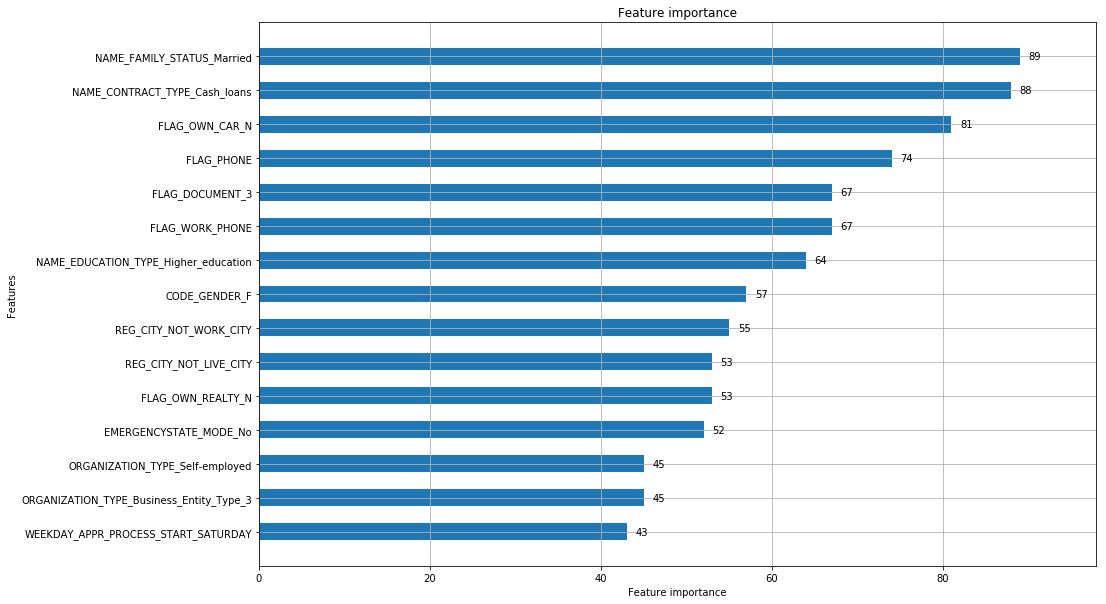

In [25]:
lightgbm_feature_plot(float_df, df['TARGET'], 'LightGBM Float Feature Importance')
lightgbm_feature_plot(integer_df, df['TARGET'],'LightGBM Integer Feature Importance')
lightgbm_feature_plot(X_encoded, df['TARGET'], 'LightGBM Categorical Feature Importance')

In [26]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
normalized_integer_df = pd.DataFrame(scaler.fit_transform(integer_df))

float_df.fillna(method='bfill', inplace=True)
normalized_float_df = pd.DataFrame(scaler.fit_transform(float_df))

/Users/dhruvnair/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [27]:
normalized_float_df.columns = float_df.columns

In [28]:
normalized_integer_df.columns = integer_df.columns

In [29]:
X_final = pd.concat([df['SK_ID_CURR'], normalized_float_df, normalized_integer_df, X_encoded, X_pca], axis=1)
X_final.shape

(307511, 201)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_final, df['TARGET'], test_size=0.3, random_state=42)

In [32]:
train = pd.concat([X_train, y_train], axis=1)
valid = pd.concat([X_valid, y_valid], axis=1)

In [17]:
train.isnull().sum().sum()

0

In [33]:
train.shape

(215257, 202)

In [34]:
train.to_csv('home-credit-train.csv', sep=',')
valid.to_csv('home-credit-valid.csv', sep=',')